In [49]:
from deepface import DeepFace

import os

import cv2
import matplotlib.pyplot as plt
import json

In [10]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "SFace"]
metrics = ["cosine", "euclidean", "euclidean_l2"]

ref_path = "dataset"
cmp_path = "before"

header_List =["file_x","file_y",
                  "VGG-Face_cosine","VGG-Face_cosine_verifie",
                  "VGG-Face_euclidean","VGG-Face_euclidean_verifie",
                  "VGG-Face_euclidean_l2","VGG-Face_euclidean_l2_verifie",
                  "Facenet_cosine","Facenet_cosine_verifie",
                  "Facenet_euclidean","Facenet_euclidean_verifie",
                  "Facenet_euclidean_l2","Facenet_euclidean_l2_verifie",
                  "Facenet512_cosine","Facenet512_cosine_verifie",
                  "Facenet512_euclidean","Facenet512_euclidean_verifie",
                  "Facenet512_euclidean_l2","Facenet512_euclidean_l2_verifie",
                  "OpenFace_cosine","OpenFace_cosine_verifie",
                  "OpenFace_euclidean","OpenFace_euclidean_verifie",
                  "OpenFace_euclidean_l2","OpenFace_euclidean_l2_verifie",
                  "DeepFace_cosine","DeepFace_cosine_verifie",
                  "DeepFace_euclidean","DeepFace_euclidean_verifie",
                  "DeepFace_euclidean_l2","DeepFace_euclidean_l2_verifie",
                  "DeepID_cosine","DeepID_cosine_verifie",
                  "DeepID_euclidean","DeepID_euclidean_verifie",
                  "DeepID_euclidean_l2","DeepID_euclidean_l2_verifie",
                  "ArcFace_cosine","ArcFace_cosine_verifie",
                  "ArcFace_euclidean","ArcFace_euclidean_verifie",
                  "ArcFace_euclidean_l2","ArcFace_euclidean_l2_verifie",
                  "SFace_cosine","SFace_cosine_verifie",
                  "SFace_euclidean","SFace_euclidean_verifie",
                  "SFace_euclidean_l2","SFace_euclidean_l2_verifie","total_verified"]


In [ ]:
f = open("data_compare.csv", "w", encoding="UTF-8")

data_list=[]

for i in range(0,50):
    f.write(header_List[i] +',')
f.write(header_List[50] + "\n")    


ref_list = os.listdir(ref_path)
ref_list_jpg = [file for file in ref_list if file.endswith(".jpg")]
cmp_list = os.listdir(cmp_path)
cmp_list_jpg = [file for file in cmp_list if file.endswith(".jpg")]

for ref in ref_list_jpg:
    for cmp in cmp_list_jpg:
        print("Reference > " + ref)
        print("Compare > " + cmp)
        sum_value = 0
        data=[]
        data.append('dataset/' + ref)
        data.append('dataset/' + cmp)
        for i in models:
            for j in metrics:
                result = DeepFace.verify(img1_path = ref_path + "/" + ref, img2_path = cmp_path + "/" + cmp, model_name = i, distance_metric = j)
                data.append(str(result['distance']))
                data.append(str(result['verified']))
                if((str(result['verified']))=='True'):
                    sum_value = 1 + sum_value
     
        for i in range(0,50):
            f.write(data[i] + ",")
            
        if(sum_value>12):
            f.write("True" + '\n')
        elif(sum_value<=12):
            f.write("False"+'\n')
            
print("종료")      
f.close()

There are  6  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 0s 90ms/step
find function lasts  0.3603026866912842  seconds
cmp_db/img1.jpg
cmp_db/img11.jpg
cmp_db/img10.jpg


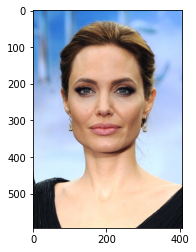

In [34]:
df = DeepFace.find(img_path = ref_path + "/" + "img1.jpg", db_path = "cmp_db")
img = cv2.imread(ref_path + "/" + "img1.jpg")
plt.imshow(img[:,:,::-1])
# print(df)
for i in df['identity']:
    print(i)
    img = cv2.imread(i)
    plt.imshow(img[:,:,::-1])
    # print(i)

In [61]:
img_data = DeepFace.analyze(img_path)
img_data

Action: emotion:   0%|                                                      | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 10ms/step


Action: age:   0%|                                                          | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 104ms/step


Action: gender:  50%|███████████████████████▌                       | 2/4 [00:00<00:00,  8.25it/s]

1/1 [==============================] - 0s 114ms/step


Action: race:  75%|████████████████████████████████████▊            | 3/4 [00:00<00:00,  8.00it/s]

1/1 [==============================] - 0s 123ms/step


Action: race: 100%|█████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.75it/s]


{'emotion': {'angry': 7.389160990715027,
  'disgust': 3.952187057620904e-05,
  'fear': 2.0569467917084694,
  'happy': 4.934905841946602,
  'sad': 3.5197459161281586,
  'surprise': 0.007477666076738387,
  'neutral': 82.09172487258911},
 'dominant_emotion': 'neutral',
 'region': {'x': 273, 'y': 72, 'w': 248, 'h': 248},
 'age': 33,
 'gender': 'Man',
 'race': {'asian': 0.042288790765667904,
  'indian': 0.32906478369622133,
  'black': 0.0187161913587118,
  'white': 68.53712609631575,
  'middle eastern': 17.82700376671575,
  'latino hispanic': 13.245799436914886},
 'dominant_race': 'white'}

In [59]:
img_path = ref_path + "/" + "img16.jpg"
img_data = DeepFace.analyze(img_path)
img = json.loads(img_data)
print(img)
img = cv2.imread(img_path)
plt.imshow(img[:,:,::-1])

Action: g:   0%|                                                            | 0/6 [00:00<?, ?it/s]


IndexError: list index out of range

In [62]:
type(img_data)

dict

In [ ]:
for ref in ref_list_jpg:
    print(ref)
    for i in models:
        print(i)
        embedding = DeepFace.represent(img_path = ref_path + "/" + ref, model_name = i)
        print(embedding)

In [ ]:
DeepFace.stream(db_path = "cmp_camera")

In [ ]:
obj = DeepFace.analyze(img_path = ref_path + "/" + "img4.jpg")
obj